### **Implementing N Queens using Genetic Algorithm**

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
n = 8                          #Number of Queens
p = 500                        #Number of Population
current_generation = []        #Current Generation
new_generation = []            #New Generation

In [3]:
# Randomly positioning the queen in the 8X8 board
def randomGeneration(NumberOfRows,NumberOfQueens):
    generation_list = []
    for i in range(NumberOfRows):
        gene = []
        for j in range(NumberOfQueens):
            gene.append(random.randint(1,n))
        gene.append(0)
        generation_list.append(gene)
    return generation_list

In [4]:
def fitness(population_list):
    i = 0
    conflict = 0
    while i < len(population_list):
        j = 0
        conflict = 0
        while j < n:
            l = j+1

            while l < n:
                if population_list[i][j] == population_list[i][l]:
                    conflict+=1
                if abs(j-l)==abs(population_list[i][j]-population_list[i][l]):
                    conflict+=1
                l+=1
            j+=1
        population_list[i][len(population_list[j])-1]=conflict
        i+=1
        
    for i in range(len(population_list)):
        min = i
        for j in range(i,len(population_list)):
            if population_list[j][n]<population_list[min][n]:
                min = j
        temp =  population_list[i]
        population_list[i] = population_list[min]
        population_list[min] = temp
    return population_list

In [5]:
#cross over
def cross_over(generation_list):
    for i in range(0,len(generation_list),2):
        z = 0
        new_kid1 = []
        new_kid2 = []
        while z<n:
            if(z<n//2):
                new_kid1.append(generation_list[i][z])
                new_kid2.append(generation_list[i+1][z])
            else:
                new_kid1.append(generation_list[i+1][z])
                new_kid2.append(generation_list[i][z])
            z+=1
        new_kid1.append(0)
        new_kid2.append(0)
        generation_list.append(new_kid1)
        generation_list.append(new_kid2)
    return generation_list

In [6]:
# mutation
def mutation(generation_list):
    muted_list=[]
    i = 0
    while i<p//2:
        new_rand = random.randint(p//2,p-1)
        if new_rand not in muted_list:
            muted_list.append(new_rand)
            generation_list[new_rand][random.randint(0,n-1)]=random.randint(1,n-1)
            #print("Muted:",new_rand)
            i+=1
    return generation_list

In [7]:
def showRes(res):
    l = len(res)
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], res[:l - 1])
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color = "k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color = "k")

-------------------------------------------------------
Epoch  1
Best Solution:  [2, 6, 1, 3, 8, 1, 7, 4, 2]
-------------------------------------------------------
Epoch  2
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  3
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  4
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  5
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  6
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  7
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  8
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------------------------------------------
Epoch  9
Best Solution:  [3, 8, 2, 7, 4, 6, 1, 5, 1]
-------------------

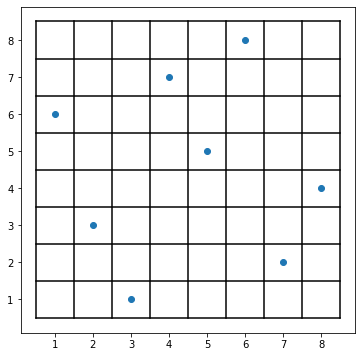

In [8]:
current_generation = randomGeneration(p,n)
current_generation = fitness(current_generation)
epoch = 1
while True:
    print("-------------------------------------------------------")
    print("Epoch ",epoch)
    current_generation = current_generation[0:p//2]
    new_generation = cross_over(current_generation)
    new_generation = mutation(new_generation)
    current_generation = new_generation
    current_generation = fitness(current_generation)
    if current_generation[0][n] == 0:
        print("Solution Found: ", current_generation[0])
        showRes(current_generation[0])
        break
    else:
        print("Best Solution: ", current_generation[0])
    epoch+=1